In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
%matplotlib inline 

In [2]:
df = pd.read_csv('Algerian_forst_fires_cleaned_dataset.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
# drop day, month and year
df.drop(['day', 'month', 'year'], axis=1, inplace=True)

In [6]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [7]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [8]:
df['Classes'] = df['Classes'].str.strip()

In [9]:
df['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [10]:
# Replace 'Fire' with 0 and 'Not Fire' with 1 in the 'Classes' column
df['Classes'] = df['Classes'].replace({'fire': 1, 'not fire': 0})

# Check the updated 'Classes' column
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [12]:
df.tail(20)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
223,30,73,14,0.0,79.2,6.5,16.6,2.1,6.6,1.2,0,1
224,31,72,14,0.0,84.2,8.3,25.2,3.8,9.1,3.9,1,1
225,29,49,19,0.0,88.6,11.5,33.4,9.1,12.4,10.3,1,1
226,28,81,15,0.0,84.6,12.6,41.5,4.3,14.3,5.7,1,1
227,32,51,13,0.0,88.7,16.0,50.2,6.9,17.8,9.8,1,1
228,33,26,13,0.0,93.9,21.2,59.2,14.2,22.4,19.3,1,1
229,34,44,12,0.0,92.5,25.2,63.3,11.2,26.2,17.5,1,1
230,36,33,13,0.1,90.6,25.8,77.8,9.0,28.2,15.4,1,1
231,29,41,8,0.1,83.9,24.9,86.0,2.7,28.9,5.6,1,1
232,34,58,13,0.2,79.5,18.7,88.0,2.1,24.4,3.8,0,1


In [13]:
# Independent and dependent features
X = df.drop('FWI', axis =1)
y = df['FWI']

In [14]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [15]:
## train test split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.25, random_state=42)

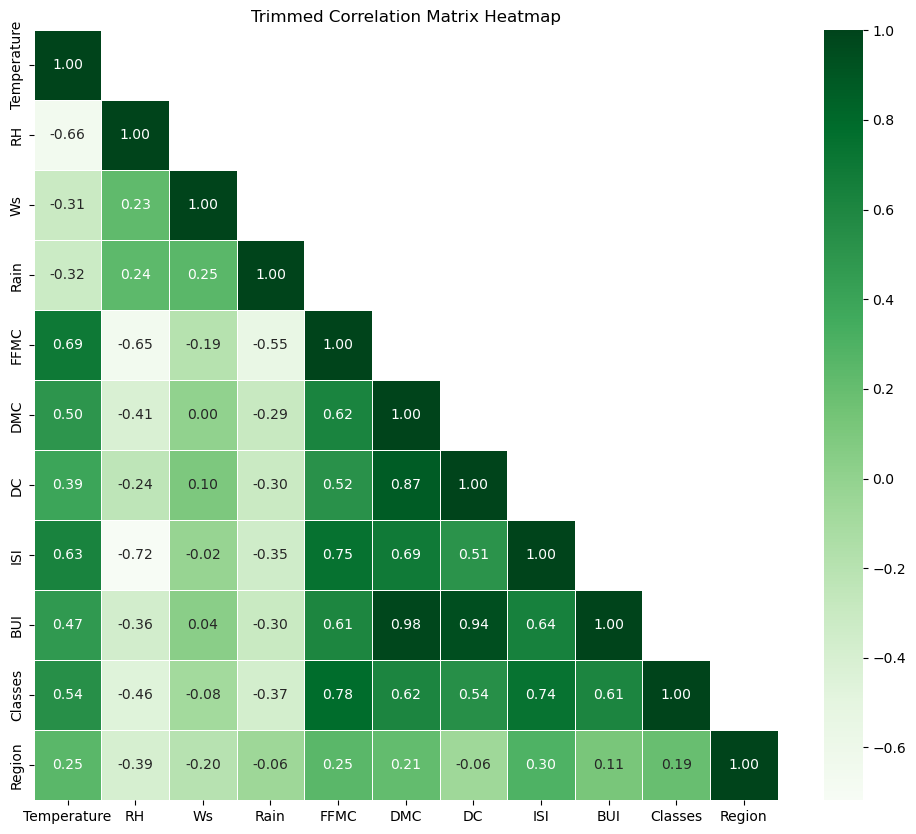

In [17]:
## Feature selection based on correlation
# Calculate the correlation matrix
correlation_matrix = X_train.corr()

# Create a mask to hide the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

# Plotting the heatmap with the upper triangle masked
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f", linewidths=.5, mask=mask)
plt.title('Trimmed Correlation Matrix Heatmap')
plt.show()

SO we should remove any very highly correlated correlations and negative may be of our interest.

In [23]:
## Checking the multicolinearlity we set threshold 

def correlation(dataset, threshold):
    col_corr =set()
    corr_matrix =dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add((colname)) # col_corr.add((colname, corr_matrix.columns[j])) can be use to see which pair shows the correlation above threshold
    return col_corr

In [24]:
corr_features = correlation(X_train, 0.85) # here thresholds are normally set by domain experts. But in our present case, we are just choosing 85%.
corr_features

{'BUI', 'DC'}

so we can drop these columns.


In [25]:
# drop features when correlation is more than 0.85
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)
X_train.shape, X_test.shape

((182, 9), (61, 9))

## Feature scaling or standardization

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Box plot to understand effect of standard scaler

C:\Users\hp\AppData\Local\Temp\ipykernel_3972\3943478109.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


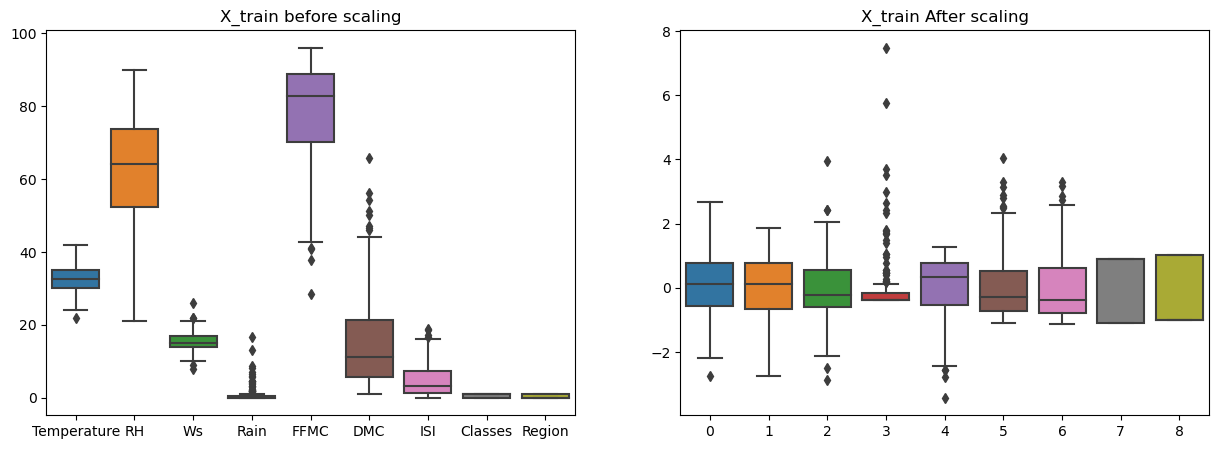

In [27]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data = X_train)
plt.title("X_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(data = X_train_scaled)
plt.title("X_train After scaling")
plt.show()

## Linear regression

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred =linreg.predict(X_test_scaled)


mae = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f'Mean absolute error = {mae}')
print(f'Mean squared error = {mse}')
print(f'R-squared value = {score}')

Mean absolute error = 0.5468236465249976
Mean squared error = 0.6742766873791581
R-squared value = 0.9847657384266951


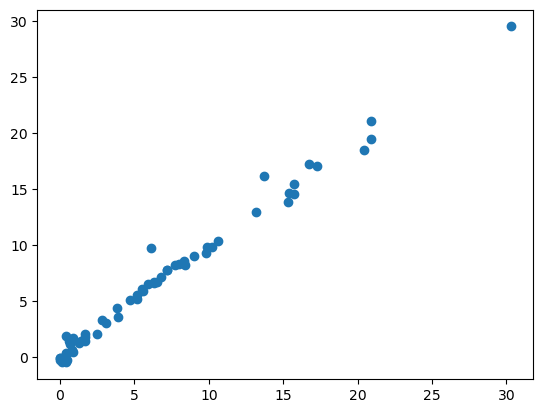

In [36]:
plt.scatter(y_test, y_pred)

## Lasso regression

In [37]:
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred =lasso.predict(X_test_scaled)


mae = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f'Mean absolute error = {mae}')
print(f'Mean squared error = {mse}')
print(f'R-squared value = {score}')

Mean absolute error = 1.1331759949144085
Mean squared error = 2.2483458918974746
R-squared value = 0.9492020263112388


#### Lasso cross validation

In [40]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled, y_train)

LassoCV(cv=5)

In [50]:
y_pred = lassocv.predict(X_test_scaled)
y_pred

array([ 8.17490595,  7.68312478, -0.25676525,  4.72643402,  6.78715772,
        1.77624325,  2.23148094,  7.64057821,  1.99176323,  3.39941035,
        0.62808928,  9.95945488,  9.36168319, 16.98503659, 18.28488762,
        1.61644108,  1.62751276, -0.6415713 ,  7.28510526,  3.10926518,
        1.95541903,  0.18069335,  6.47563129,  0.14318503, 20.99597009,
        5.11755206,  5.86208849,  9.75914403, -0.77037467,  9.91838577,
        6.72277075, -0.31776007, 10.31109643, 14.4365551 ,  1.71022677,
        0.83439752,  2.03414915,  5.97488529, -0.6263644 , -0.56200288,
        6.47253729,  2.07971408,  8.46741557, -0.8464481 , 15.40443856,
        8.32941189,  8.48782486,  1.44030355, 13.02752812,  1.20911545,
       29.08623849,  5.49737681, 17.15937199, 19.28890096, 13.71102991,
       16.05355549,  0.99056448,  9.0873725 ,  3.84455993, 14.43991192,
        5.23034139])

In [42]:
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

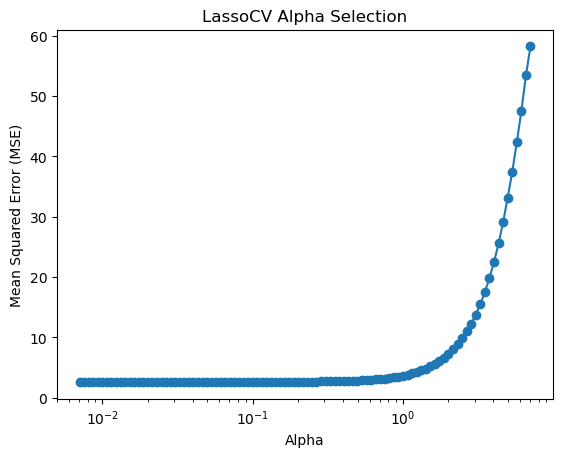

In [51]:
# Plotting alphas against mean squared errors
plt.plot(lassocv.alphas_, lassocv.mse_path_.mean(axis=-1), marker='o')
plt.xscale('log')  # Using a logarithmic scale for better visualization
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('LassoCV Alpha Selection')
plt.show()

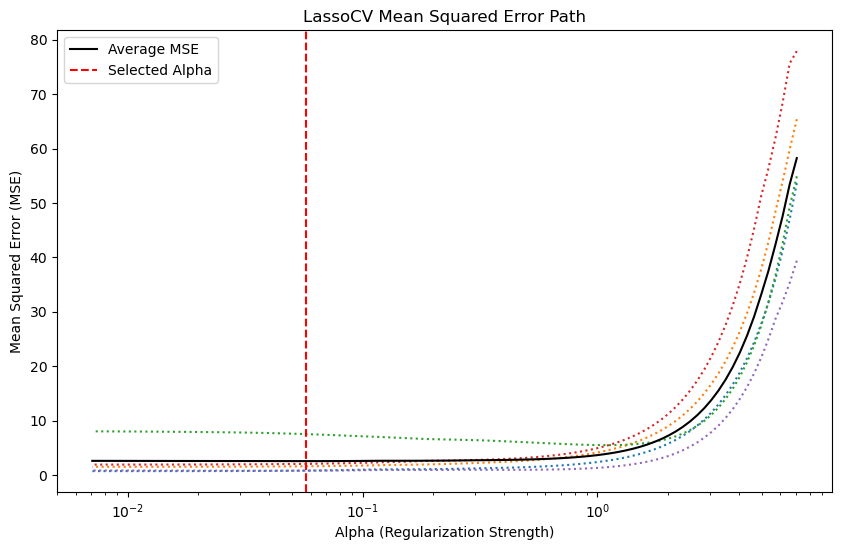

In [44]:
# Plot MSE path
plt.figure(figsize=(10, 6))
plt.plot(lassocv.alphas_, lassocv.mse_path_, ':')
plt.plot(lassocv.alphas_, lassocv.mse_path_.mean(axis=-1), 'k', label='Average MSE')
plt.axvline(lassocv.alpha_, linestyle='--', color='r', label='Selected Alpha')
plt.legend()
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('LassoCV Mean Squared Error Path')
plt.show()

## Ridge regression model

In [38]:
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred =ridge.predict(X_test_scaled)


mae = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f'Mean absolute error = {mae}')
print(f'Mean squared error = {mse}')
print(f'R-squared value = {score}')

Mean absolute error = 0.5642305340105693
Mean squared error = 0.6949198918152067
R-squared value = 0.9842993364555513


### Ridge cross validation

Mean absolute error=0.5642305340105693
R-squared value = 0.9842993364555513


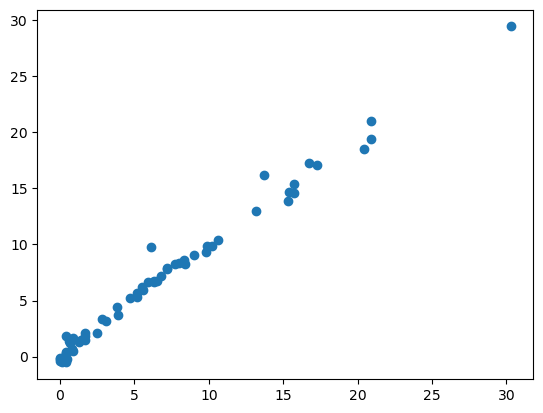

In [52]:
from sklearn.linear_model import RidgeCV 
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled, y_train)
y_pred = ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f"Mean absolute error={mae}")
print(f"R-squared value = {score}")

In [53]:
ridgecv.alpha_

1.0

In [55]:
ridgecv.alphas

(0.1, 1.0, 10.0)

so out of (0.1, 1.0, 10.0) alphas, it choose 1.0.

In [57]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

## Elasticnet regression

In [39]:
from sklearn.linear_model import ElasticNet

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
elastic = ElasticNet()
elastic.fit(X_train_scaled, y_train)
y_pred =elastic.predict(X_test_scaled)


mae = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f'Mean absolute error = {mae}')
print(f'Mean squared error = {mse}')
print(f'R-squared value = {score}')

Mean absolute error = 1.8822353634896
Mean squared error = 5.517251101025224
R-squared value = 0.8753460589519703


### ELasricnet cross validation

Mean absolute error = 0.6575946731430904
Mean squared error = 0.8222830416276272
R-squared value = 0.9814217587854941


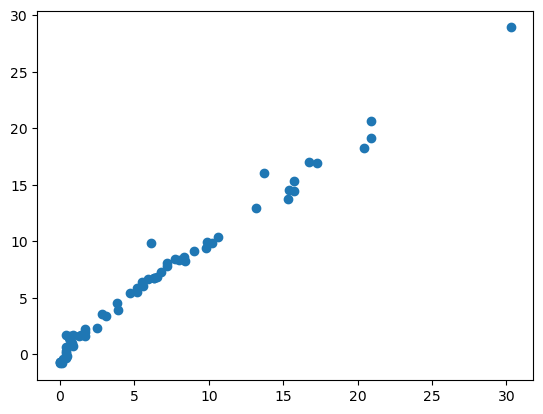

In [58]:
from sklearn.linear_model import ElasticNetCV

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
elasticcv = ElasticNetCV()
elasticcv.fit(X_train_scaled, y_train)
y_pred =elasticcv.predict(X_test_scaled)

plt.scatter(y_test,y_pred)

mae = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f'Mean absolute error = {mae}')
print(f'Mean squared error = {mse}')
print(f'R-squared value = {score}')

In [59]:
elasticcv.alphas_

array([14.11706004, 13.16561744, 12.27829889, 11.45078264, 10.67903821,
        9.95930678,  9.28808283,  8.66209714,  8.07830078,  7.53385034,
        7.02609405,  6.55255882,  6.11093829,  5.6990815 ,  5.31498248,
        4.95677045,  4.62270071,  4.31114616,  4.02058933,  3.74961507,
        3.49690356,  3.26122397,  3.04142839,  2.83644629,  2.64527931,
        2.46699633,  2.30072904,  2.1456676 ,  2.00105679,  1.86619226,
        1.74041714,  1.62311885,  1.51372607,  1.411706  ,  1.31656174,
        1.22782989,  1.14507826,  1.06790382,  0.99593068,  0.92880828,
        0.86620971,  0.80783008,  0.75338503,  0.7026094 ,  0.65525588,
        0.61109383,  0.56990815,  0.53149825,  0.49567705,  0.46227007,
        0.43111462,  0.40205893,  0.37496151,  0.34969036,  0.3261224 ,
        0.30414284,  0.28364463,  0.26452793,  0.24669963,  0.2300729 ,
        0.21456676,  0.20010568,  0.18661923,  0.17404171,  0.16231189,
        0.15137261,  0.1411706 ,  0.13165617,  0.12278299,  0.11

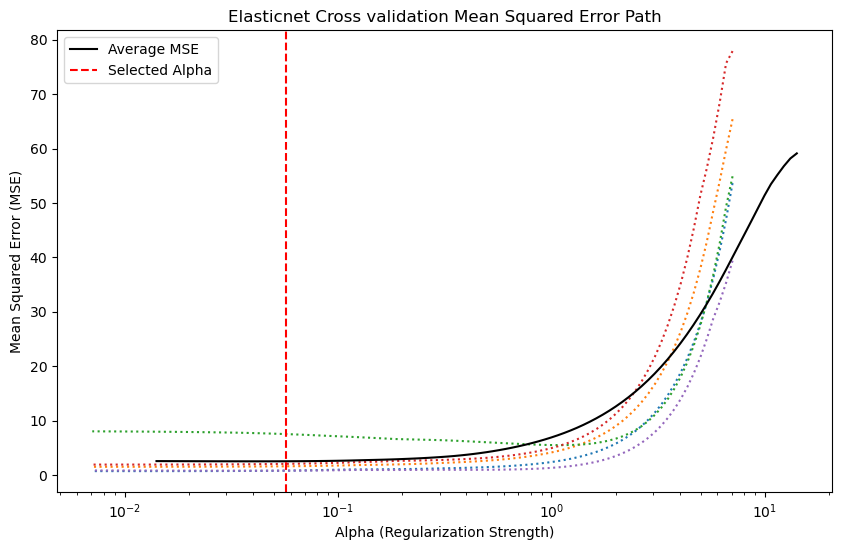

In [61]:
# Plot MSE path
plt.figure(figsize=(10, 6))
plt.plot(lassocv.alphas_, lassocv.mse_path_, ':')
plt.plot(elasticcv.alphas_, elasticcv.mse_path_.mean(axis=-1), 'k', label='Average MSE')
plt.axvline(lassocv.alpha_, linestyle='--', color='r', label='Selected Alpha')
plt.legend()
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Elasticnet Cross validation Mean Squared Error Path')
plt.show()